In [2]:
#Importando librerias
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

from shapely.geometry import box
import earthpy as et
import seaborn as sns

import warnings
warnings.filterwarnings('ignore','Geoseries.notna', UserWarning)

#Configuracion de graficas
sns.set(font_scale = 1.5, style ='whitegrid')

#Directorio de trabajo
os.chdir(os.path.join(et.io.HOME,'earth-analytics'))

In [3]:
# Import all of your data at the top of your notebook to keep things organized.
country_boundary_us_path = os.path.join("data", 'earthpy-downloads',
                                        "spatial-vector-lidar", 
                                        "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("data", 'earthpy-downloads',
                                      "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("data", 'earthpy-downloads',
                               "spatial-vector-lidar", "global", 
                               "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

# Are the data all in the same crs?
print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places", pop_places.crs)

country_boundary_us epsg:4326
state_boundary_us epsg:4326
pop_places epsg:4326


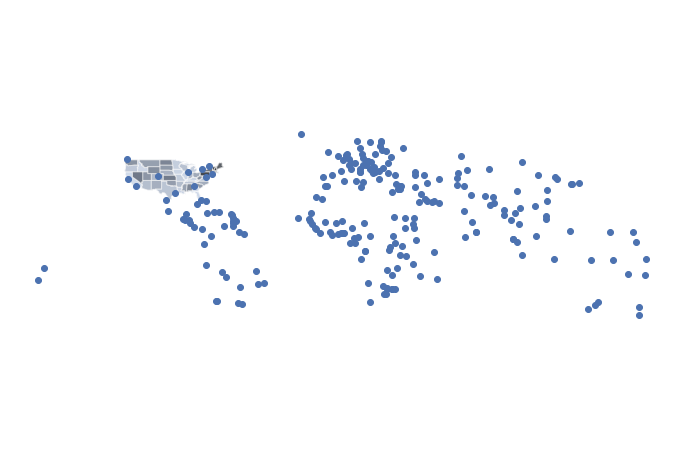

In [4]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5,
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)
pop_places.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [5]:
#Recortando los datos, para visualizarlos dentro de los limites
#graficados
points_clip = gpd.clip(pop_places, country_boundary_us)
#Primeras 6 filas
points_clip.head(6)

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,geometry
178,1,300,1,Populated place,Miami,None,None,0,Miami,0.0,...,1037811,13,10,4164138.0,Miami,Miami,1,0,2.1,POINT (-80.22605 25.78956)
177,1,300,1,Populated place,Houston,None,None,0,Houston,0.0,...,3607616,12,12,4699066.0,Houston,Houston,1,0,3.0,POINT (-95.34193 29.82192)
179,1,300,1,Admin-1 capital,Atlanta,None,None,0,Atlanta,0.0,...,2874096,12,10,4180439.0,Atlanta,Atlanta,1,0,3.0,POINT (-84.40190 33.83196)
216,0,600,1,Populated place,Los Angeles,None,Los Angeles-Long Beach-Santa Ana,0,Los Angeles,0.0,...,142265,14,12,5368361.0,Los Angeles-Long Beach-Santa Ana,Los Angeles1,1,0,2.0,POINT (-118.18193 33.99192)
175,1,300,1,Populated place,San Francisco,None,San Francisco-Oakland,0,San Francisco,0.0,...,27400,12,11,5391959.0,San Francisco-Oakland,San Francisco1,1,0,2.7,POINT (-122.41717 37.76920)
217,0,600,1,Admin-0 capital,"Washington, D.C.",None,Washington D.C.,0,"Washington, D.C.",1.0,...,2175991,12,11,4140963.0,"Washington, D.C.","Washington, D.C.",1,5,2.1,POINT (-77.01136 38.90150)


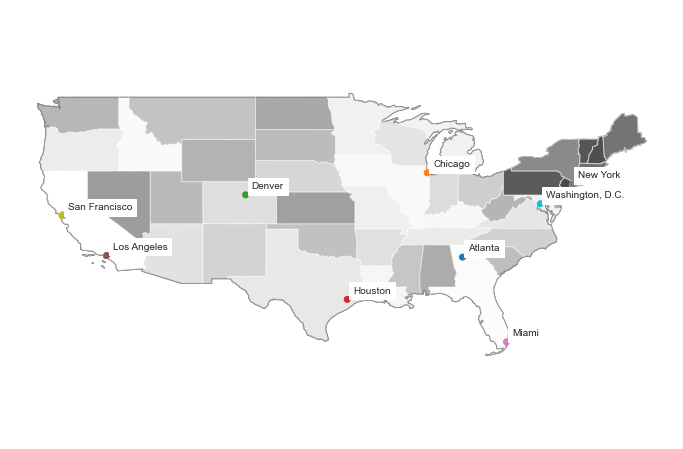

In [7]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

points_clip.plot(ax=ax,
                 column='name')
ax.set_axis_off()
plt.axis('equal')

# Label each point - note this is just shown here optionally but is not required for your homework
points_clip.apply(lambda x: ax.annotate(text=x['name'],
                                        xy=x.geometry.coords[0],
                                        xytext=(6, 6), textcoords="offset points",
                                        backgroundcolor="white"),
                  axis=1)
plt.show()

In [9]:
# Open the roads layer
ne_roads_path = os.path.join("data", 'earthpy-downloads',"spatial-vector-lidar", "global", 
                             "ne_10m_roads", "ne_10m_roads.shp")
ne_roads = gpd.read_file(ne_roads_path)

# Are both layers in the same CRS?
if (ne_roads.crs == country_boundary_us.crs):
    print("Both layers are in the same crs!",
          ne_roads.crs, country_boundary_us.crs)

Both layers are in the same crs! epsg:4326 epsg:4326


The clipped data have fewer line objects (represented by rows): (7346, 32) (56601, 32)


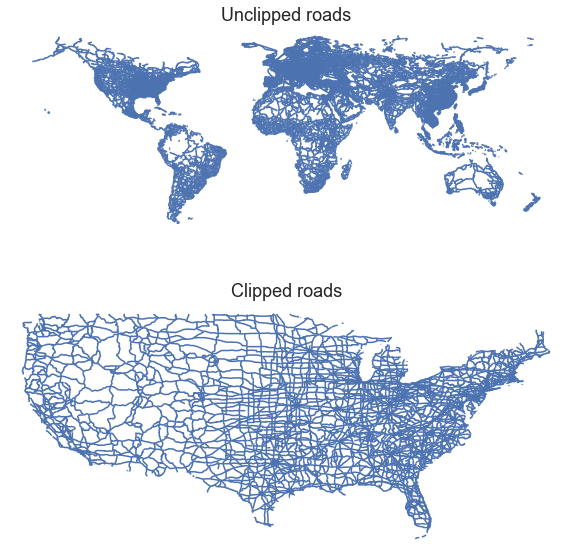

In [10]:
# Simplify the geometry of the clip extent for faster processing
# Use this with caution as it modifies your data.
country_boundary_us_sim = country_boundary_us.simplify(
    .2, preserve_topology=True)
# Clip data
ne_roads_clip = gpd.clip(ne_roads, country_boundary_us_sim)

# Ignore missing/empty geometries
ne_roads_clip = ne_roads_clip[~ne_roads_clip.is_empty]

print("The clipped data have fewer line objects (represented by rows):",
      ne_roads_clip.shape, ne_roads.shape)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ne_roads.plot(ax=ax1)
ne_roads_clip.plot(ax=ax2)

ax1.set_title("Unclipped roads")
ax2.set_title("Clipped roads")

ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

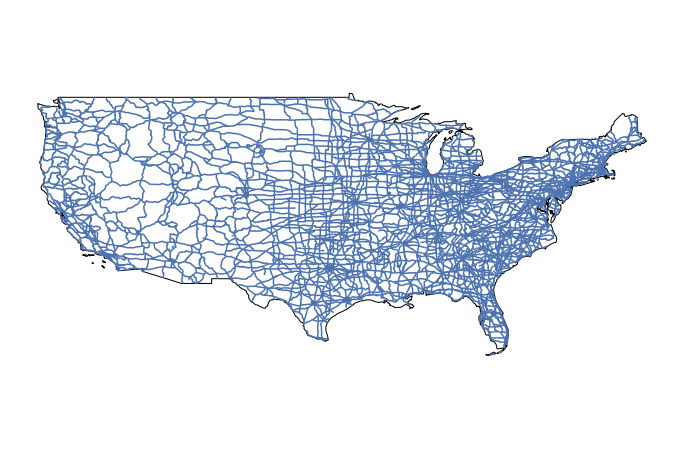

In [11]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

ne_roads_clip.plot(ax=ax)

ax.set_axis_off()
plt.axis('equal')
plt.show()

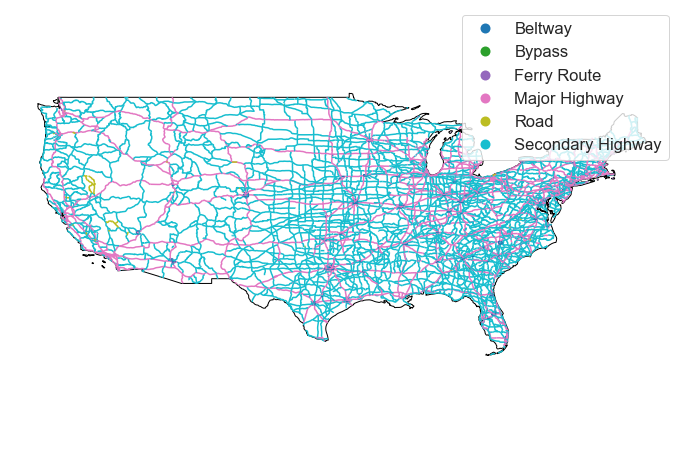

In [12]:
# Plot the data by attribute
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1, 
                         color="white", 
                         edgecolor="black", 
                         ax=ax)

ne_roads_clip.plot(ax=ax, 
                   column='type', 
                   legend=True)
ax.set_axis_off()
plt.axis('equal')
plt.show()